# Dataset для обнаружения мошенничества
### Выявляйте мошенничество на ходу с помощью обширного набора данных (более 6,3 млн строк).

#### isFraud: 1 - это мошенничество. 0 - не являестя мошенничество.
#### isFlaggedFraud: 1 - это 100% мошенничество. 0 - не являестя мошенничество.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset.csv")

In [12]:
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            str    
 2   amount          float64
 3   nameOrig        str    
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        str    
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 534.0 MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [20]:
df['isFraud'].value_counts(), df['isFlaggedFraud'].value_counts()

(isFraud
 0    6354407
 1       8213
 Name: count, dtype: int64,
 isFlaggedFraud
 0    6362604
 1         16
 Name: count, dtype: int64)

### isFraud: 1 - это мошенничество. 0 - не являестя мошенничество.
#### 8213 - кол'во мошенничества.
#### 6354407 - кол'во не являющихся мошенничеством.

### isFlaggedFraud: 1 - это 100% мошенничество. 0 - не являестя мошенничество.
#### 16 - кол'во 100%-го мошенничества.
#### 6362604 - кол'во не являющихся мошенничеством.

In [ ]:
df.isnull().sum() # где и сколько есть прокусков данных

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.shape # сколько строк и столбцов

(6362620, 11)

In [54]:
lines = df.shape[0]
amount_of_fraud = df['isFraud'].value_counts()[1]
fraud_rate = round((amount_of_fraud / lines) * 100,2) # процент мошенничества от общего объема данных
print(f'Процент мошенничества от общего объема данных составляет: {fraud_rate}%')

Процент мошенничества от общего объема данных составляет: 0.13%


<Axes: title={'center': 'Transaction Types'}, xlabel='Transaction Type', ylabel='Count'>

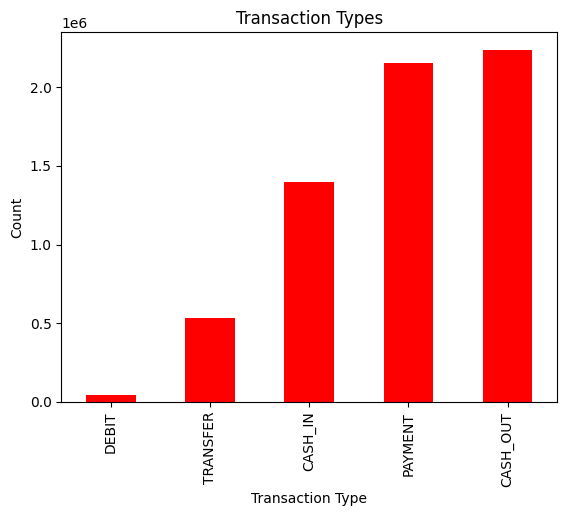

In [75]:
df['type'].value_counts().sort_values().plot(
    kind='bar',
    title='Transaction Types',
    color='red',
    xlabel='Transaction Type',
    ylabel='Count',
    ) 
# типы перевода денег и рейтинг их использования

<Axes: xlabel='type'>

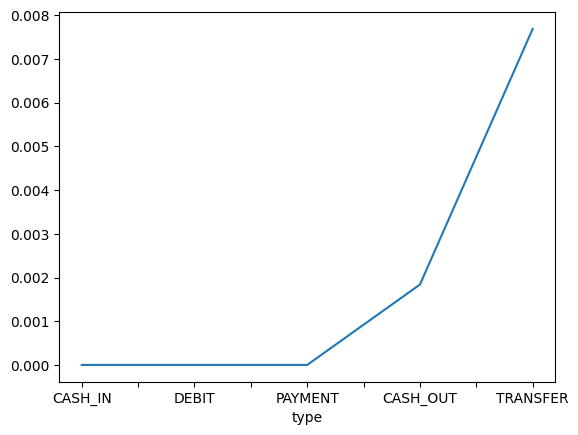

In [78]:
df.groupby('type')['isFraud'].mean().sort_values().plot(
    
)